   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude               0
latitude                0
housing_median_age     

/tmp/ipykernel_5819/1583735738.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)


Decision Tree RMSE: 69755.78
Decision Tree R^2: 0.63


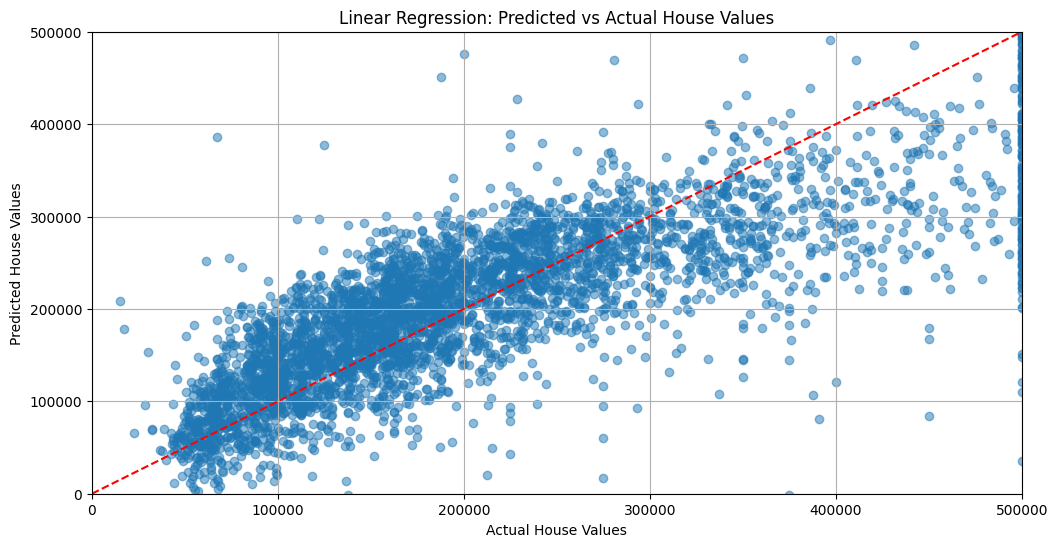

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

# Display the first few rows of the dataset
print(housing.head())

# Check for missing values
print(housing.isnull().sum())

# Handle missing values: fill missing 'total_bedrooms' with the median
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

# Encode categorical variable 'ocean_proximity' using one-hot encoding
housing = pd.get_dummies(housing, columns=['ocean_proximity'], drop_first=True)

# Define features and target variable
X = housing.drop('median_house_value', axis=1)  # Features
y = housing['median_house_value']                 # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate Linear Regression model
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression RMSE: {rmse_lin:.2f}")
print(f"Linear Regression R^2: {r2_lin:.2f}")

# Initialize and fit a Decision Tree Regressor model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_reg.predict(X_test)

# Evaluate Decision Tree model
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree RMSE: {rmse_tree:.2f}")
print(f"Decision Tree R^2: {r2_tree:.2f}")

# Visualize the relationship between predicted and actual house values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.title('Linear Regression: Predicted vs Actual House Values')
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.plot([0, 500000], [0, 500000], 'r--')  # Line for perfect predictions
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.grid()
plt.show()
